# Assignment-1 : The perceptron learning algorithm.

In [1]:
# load the dependancy

import scipy.io as sci
import numpy as np
import matplotlib.pyplot as plt

### About the datasets


This should load 4 variables:

* neg_examples_nobias - The matrix containing the examples belonging to class 0.
* pos_examples_nobias - The matrix containing the examples belonging to class 1.
* w_init - Some initial weight vector.
* w_gen_feas - A generously feasible weight vector (empty if one doesn't exist).

### Plot of the datasets

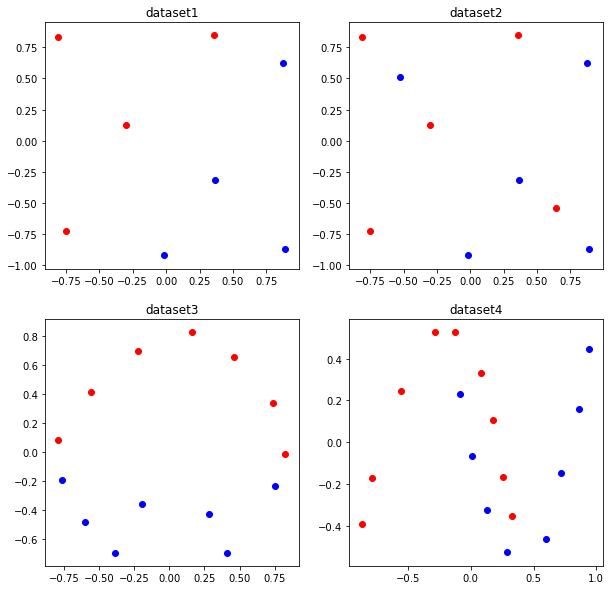

In [2]:
plt.figure(figsize=(10,10))

for i in range(1,5):
    
    var_name = "dataset" + str(i) + ".mat"
    title = "dataset" + str(i)
    data = sci.loadmat(var_name)
    
    axis_no = int('22' + str(i))
    
    neg,pos = data['neg_examples_nobias'],data['pos_examples_nobias']
    
    plt.subplot(axis_no)
    plt.scatter(neg[0:,:1],neg[:,1:],c='red')
    plt.scatter(pos[0:,:1],pos[:,1:],c='blue')
    plt.title(title)
    
plt.show()

### Learns the weights of a perceptron and displays the results.

* Learns the weights of a perceptron for a 2-dimensional dataset and plots
 the perceptron at each iteration where an iteration is defined as one
 full pass through the data. 

* If a generously feasible weight vector
 is provided then the visualization will also show the distance
 of the learned weight vectors to the generously feasible weight vector.


In [3]:
'''
 Required Inputs:
 
   neg_examples_nobias - The num_neg_examples x 2 matrix for the examples with target 0.
       num_neg_examples is the number of examples for the negative class.
   pos_examples_nobias - The num_pos_examples x 2 matrix for the examples with target 1.
       num_pos_examples is the number of examples for the positive class.
   w_init - A 3-dimensional initial weight vector. The last element is the bias.
   w_gen_feas - A generously feasible weight vector.
   
 Returns:
   w - The learned weight vector.
'''

def learn_perceptron(neg_examples_nobias,pos_examples_nobias,w_init,w_gen_feas,learn_rate=2.0):
    # Bookkeeping
    num_neg_examples = len(neg_examples_nobias)
    num_pos_examples = len(pos_examples_nobias)
    num_err_history = []
    w_dist_history = []
    
    # Here we add a column of ones to the examples in order to allow us to learn bias parameters.
    neg_examples = np.append(neg_examples_nobias,
                             np.ones((num_neg_examples,1), dtype=float),
                             axis=1)
    pos_examples = np.append(pos_examples_nobias,
                             np.ones((num_pos_examples,1), dtype=float),
                             axis=1)
    
    #If weight vectors have not been provided, initialize them appropriately.
    
    if (np.size(w_init)):
        w = np.random.rand(3,1)
    else:
        w = w_init
    
    if (np.size(w_gen_feas)):
        w_gen_feas = []
        
    # Find the data points that the perceptron has incorrectly classified and record the number of errors it makes.
    iter_ = 0
    mistakes0, mistakes1 = eval_perceptron(neg_examples,pos_examples,w)
    num_errs = len(mistakes0) + len(mistakes1)
    num_err_history.append(num_errs)
    print('Number of errors in iteration {0}: {1}\n'.format(iter_,num_errs))
    print('weights:', w)
    
    plot_perceptron(neg_examples, pos_examples, mistakes0, mistakes1, num_err_history, w, w_dist_history)
    
    
    #If a generously feasible weight vector exists, record the distance to it from the initial weight vector.
    if len(w_gen_feas) != 0 :
        w_dist_history.append (np.linalg.norm(w - w_gen_feas))
        
    #Iterate until the perceptron has correctly classified all points.
    while (num_errs > 0):
        iter_ = iter_ + 1

        #Update the weights of the perceptron.
        w = update_weights(neg_examples,pos_examples,w,learn_rate=learn_rate)
    

        #If a generously feasible weight vector exists, record the distance to it from the current weight vector.
        if (len(w_gen_feas) != 0):
            w_dist_history.append(np.linalg.norm(w - w_gen_feas))
    
        #Find the data points that the perceptron has incorrectly classified and record the number of errors it makes.
        [mistakes0, mistakes1] = eval_perceptron(neg_examples,pos_examples,w)
        num_errs = len(mistakes0) + len(mistakes1)
        num_err_history.append(num_errs)
        
        print('Number of errors in iteration {0}: {1}\n'.format(iter_,num_errs))
        print('weights:',w)
    
        plot_perceptron(neg_examples, pos_examples, mistakes0, mistakes1, num_err_history, w, w_dist_history)
        
        #input('<Press enter to continue...')
        
        return w

In [4]:

def update_weights(neg_examples, pos_examples, w_current,learn_rate=2.0):
    
    """ 
        Updates the weights of the perceptron for incorrectly classified points using the perceptron
        update algorithm. This function makes one sweep over the dataset.
        
        Args:
            neg_examples - The num_neg_examples x 3 matrix for the examples with target 0.
                num_neg_examples is the number of examples for the negative class.
            pos_examples- The num_pos_examples x 3 matrix for the examples with target 1.
                num_pos_examples is the number of examples for the positive class.
            w_current - A 3-dimensional weight vector, the last element is the bias.
        
        Returns:
            w - The weight vector after one pass through the dataset using the perceptron learning rule.
    """
    w = w_current

    for i in range(len(neg_examples)):
        this_case = neg_examples[i]
        x = this_case
        activation = this_case.dot(w)
        if (activation >= 0):
            #print("YOUR CODE HERE")
             w += learn_rate * np.column_stack(x).T * (0.0 - activation)
    for i in range(len(pos_examples)):
        this_case = pos_examples[i]
        x = this_case
        activation = this_case.dot(w)
        if (activation < 0):
            #print("YOUR CODE HERE")
             w += learn_rate * np.column_stack(x).T * (1.0 - activation)
    return w            

In [5]:
def eval_perceptron(neg_examples, pos_examples, w):
    """
    Evaluates the perceptron using a given weight vector. Here, evaluation
    refers to finding the data points that the perceptron incorrectly classifies.
    
    Inputs:
        neg_examples - The num_neg_examples x 3 matrix for the examples with target 0.
            num_neg_examples is the number of examples for the negative class.
        pos_examples- The num_pos_examples x 3 matrix for the examples with target 1.
            num_pos_examples is the number of examples for the positive class.
        w - A 3-dimensional weight vector, the last element is the bias.
 
    Returns:
       mistakes0 - A vector containing the indices of the negative examples that have been
                   incorrectly classified as positive.
       mistakes0 - A vector containing the indices of the positive examples that have been
                   incorrectly classified as negative.
    
    """
    mistakes0 = []
    mistakes1 = []
    for i in range(len(neg_examples)):
        x = neg_examples[i]
        activation = x.dot(w)
        if (activation >= 0):
            mistakes0.append(i)
    
    for i in range(len(pos_examples)):
        x = pos_examples[i]
        activation = x.dot(w)
        if (activation < 0):
            mistakes1.append(i)
    return [mistakes0, mistakes1]            

In [6]:
def plot_perceptron(neg_examples, pos_examples, mistakes0, mistakes1,
                    num_err_history, w, w_dist_history):
    """The top-left plot shows the dataset and the classification boundary given by
    the weights of the perceptron. The negative examples are shown as circles
    while the positive examples are shown as squares. If an example is colored
    green then it means that the example has been correctly classified by the
    provided weights. If it is colored red then it has been incorrectly classified.
    The top-right plot shows the number of mistakes the perceptron algorithm has
    made in each iteration so far.
    The bottom-left plot shows the distance to some generously feasible weight
    vector if one has been provided (note, there can be an infinite number of these).
    Points that the classifier has made a mistake on are shown in red,
    while points that are correctly classified are shown in green.
    The goal is for all of the points to be green (if it is possible to do so).
    Args:
        neg_examples    : The num_neg_examples x 3 matrix for the examples with target 0.
                          num_neg_examples is the number of examples for the negative class.
        pos_examples    : The num_pos_examples x 3 matrix for the examples with target 1.
                          num_pos_examples is the number of examples for the positive class.
        mistakes0       : A vector containing the indices of the datapoints from class 0 incorrectly
                          classified by the perceptron. This is a subset of neg_examples.
        mistakes1       : A vector containing the indices of the datapoints from class 1 incorrectly
                          classified by the perceptron. This is a subset of pos_examples.
        num_err_history : A vector containing the number of mistakes for each
                          iteration of learning so far.
        w               : A 3-dimensional vector corresponding to the current weights of the
                          perceptron. The last element is the bias.
        w_dist_history  : A vector containing the L2-distance to a generously
                          feasible weight vector for each iteration of learning so far.
                          Empty if one has not been provided.
    """
    f = plt.figure(1)

    neg_correct_ind = np.setdiff1d(range(len(neg_examples)), mistakes0)
    pos_correct_ind = np.setdiff1d(range(len(pos_examples)), mistakes1)
    assert all(m_idx not in set(neg_correct_ind) for m_idx in mistakes0) and \
        all(m_idx not in set(pos_correct_ind) for m_idx in mistakes1)

    plt.subplot(2,2,1)
    
    if np.size(neg_examples):
        plt.plot(neg_examples[neg_correct_ind][:, 0], neg_examples[neg_correct_ind][:, 1], 'og', markersize=10)
    if np.size(pos_examples):
        plt.plot(pos_examples[pos_correct_ind][:, 0], pos_examples[pos_correct_ind][:, 1], 'sg', markersize=10)

    if len(mistakes0):
        plt.plot(neg_examples[mistakes0][:, 0], neg_examples[mistakes0][:, 1], 'or', markersize=10)
    if len(mistakes1):
        plt.plot(pos_examples[mistakes1][:, 0], pos_examples[mistakes1][:, 1], 'sr', markersize=10)

    plt.title('Perceptron Classifier')
    # In order to plot the decision line, we just need to get two points.
    plt.plot([-5, 5], [(-w[-1] + 5 * w[0]) / w[1], (-w[-1] - 5 * w[0]) / w[1]], 'k')
    plt.xlim([-1,4])
    plt.ylim([-2,2])
    

    plt.subplot(2,2,2)
    plt.plot(range(len(num_err_history)), num_err_history)
    plt.xlim([-1, max(15, len(num_err_history))])
    plt.ylim([0, len(neg_examples) + len(pos_examples) + 1])
    plt.title('Number of errors')
    plt.xlabel('Iteration')
    plt.ylabel('Number of errors')

    plt.subplot(2,2,3)
    plt.plot(range(len(w_dist_history)), w_dist_history)
    plt.xlim([-1, max(15, len(num_err_history))])
    plt.ylim([0, 15])
    plt.title('Distance')
    plt.xlabel('Iteration')
    plt.ylabel('Distance')
    plt.show()

In [7]:
# Plots information about a perceptron classifier on a 2-dimensional dataset.

def plot_perceptron1(neg_examples, pos_examples, mistakes0, mistakes1, num_err_history, w, w_dist_history):
    """
        The top-left plot shows the dataset and the classification boundary given by
        the weights of the perceptron. The negative examples are shown as circles
        while the positive examples are shown as squares. If an example is colored
        green then it means that the example has been correctly classified by the
        provided weights. If it is colored red then it has been incorrectly classified.
        The top-right plot shows the number of mistakes the perceptron algorithm has
        made in each iteration so far.
        
        The bottom-left plot shows the distance to some generously feasible weight% vector if one has been provided (note, there can be an infinite number of these).
        Points that the classifier has made a mistake on are shown in red,
        while points that are correctly classified are shown in green.
        
        The goal is for all of the points to be green (if it is possible to do so).
    
    Args:
        neg_examples - The num_neg_examples x 3 matrix for the examples with target 0.
           num_neg_examples is the number of examples for the negative class.
       
       pos_examples- The num_pos_examples x 3 matrix for the examples with target 1.
           num_pos_examples is the number of examples for the positive class.
       
       mistakes0 - A vector containing the indices of the datapoints from class 0 incorrectly
            classified by the perceptron. This is a subset of neg_examples.
       
       mistakes1 - A vector containing the indices of the datapoints from class 1 incorrectly
       classified by the perceptron. This is a subset of pos_examples.
       
       num_err_history - A vector containing the number of mistakes for each
       iteration of learning so far.
       
       w - A 3-dimensional vector corresponding to the current weights of the
           perceptron. The last element is the bias.
       
       w_dist_history - A vector containing the L2-distance to a generously
           feasible weight vector for each iteration of learning so far.
           Empty if one has not been provided.
    
    """
    f = plt.figure(1)
    plt.clf()
                                   
    neg_correct_ind = np.setdiff1d(range(len(neg_examples)), mistakes0)
    pos_correct_ind = np.setdiff1d(range(len(pos_examples)), mistakes1)
    
    assert all(m_idx not in set(neg_correct_ind) for m_idx in mistakes0) and \
        all(m_idx not in set(pos_correct_ind) for m_idx in mistakes1)
    plt.subplot(2,2,1)
    
    #matplotlib.axes.Axes.hold(True)
                                   
    if (np.size(neg_examples)):
        plt.plot(neg_examples[neg_correct_ind][:, 0],neg_examples[neg_correct_ind][:, 1],'og',markersize=10)

    if (np.size(pos_examples)):
        plt.plot(pos_examples[pos_correct_ind][:, 0],pos_examples[pos_correct_ind][:, 1],'sg',markersize=10)

    if (len(mistakes0) > 0):
        plt.plot(neg_examples[mistakes0][:, 0],neg_examples[mistakes0,2][:, 1],'or',markersize=10)

    if (len(mistakes1) > 0):
        plt.plot(pos_examples[mistakes1][:, 0],pos_examples[mistakes1,][:, 1],'sr',markersize=10)
    
    plt.title('Perceptron Classifier')

    #In order to plot the decision line, we just need to get two points.
    plt.plot([-5,5],[(-w[-1] + 5 * w[0]) / w[1], (-w[-1] - 5 * w[0]) / w[1]], 'k')
    plt.xlim([-1,1])
    plt.ylim([-1,1])
                                   
    #matplotlib.axes.Axes.hold(False)

    plt.subplot(2,2,2)
    plt.plot(range(len(num_err_history)),num_err_history)
    plt.xlim([-1,max(15,len(num_err_history))])
    plt.ylim([0,len(neg_examples)+len(pos_examples)+1])
    plt.title('Number of errors')
    plt.xlabel('Iteration')
    plt.ylabel('Number of errors')

    plt.subplot(2,2,3)
    plt.plot(range(len(w_dist_history)),w_dist_history)
    plt.xlim([-1,max(15,len(num_err_history))])
    plt.ylim([0,15])
    plt.title('Distance')
    plt.xlabel('Iteration')
    plt.ylabel('Distance')
    plt.show()


Number of errors in iteration 0: 4

('weights:', array([[ 0.73838875],
       [ 0.94771809],
       [ 0.71788945]]))


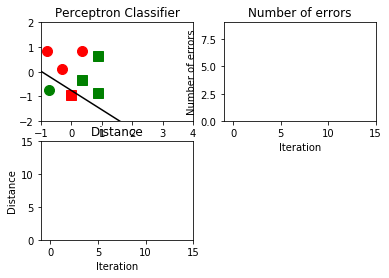

Number of errors in iteration 1: 2

('weights:', array([[ 2.15226657],
       [-3.56896579],
       [ 2.12212245]]))


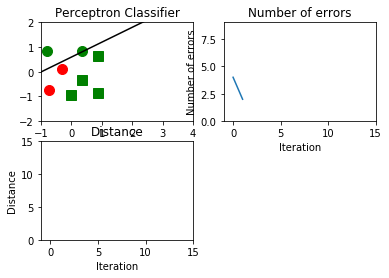

In [9]:
data = sci.loadmat('dataset1.mat')    
neg_examples_nobias,pos_examples_nobias,w_init,w_gen_feas = data['neg_examples_nobias'],data['pos_examples_nobias'],data['w_init'],data['w_gen_feas']
w = learn_perceptron(neg_examples_nobias,pos_examples_nobias,w_init,w_gen_feas)